<a href="https://colab.research.google.com/github/ritu-yadav/IPL-Score-Prediction/blob/main/IPL_Score_Prediction_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 5.3535 - val_loss: 2.2656
Epoch 2/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 2.2618 - val_loss: 2.2430
Epoch 3/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 2.2740 - val_loss: 2.2449
Epoch 4/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 2.2677 - val_loss: 2.2405
Epoch 5/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.2649 - val_loss: 2.2764
Epoch 6/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 2.2501 - val_loss: 2.2267
Epoch 7/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 2.2370 - val_loss: 2.2085
Epoch 8/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.2105 - val_loss: 2.1984
Epoch 9/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.2255 - val_loss: 2.1927
Epoch 10/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 2.2209 - val_loss: 2.1930
Epoch 11/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.2238 - val_loss: 2.2036
Epoch 12/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/s

Dropdown(description='Select Venue', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mo…

Dropdown(description='Select Batting Team', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajastha…

Dropdown(description='Select Bowling Team', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi …

Dropdown(description='Select Striker', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moham…

Dropdown(description='Select Bowler', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL …

Button(description='Predict', style=ButtonStyle())

Output()

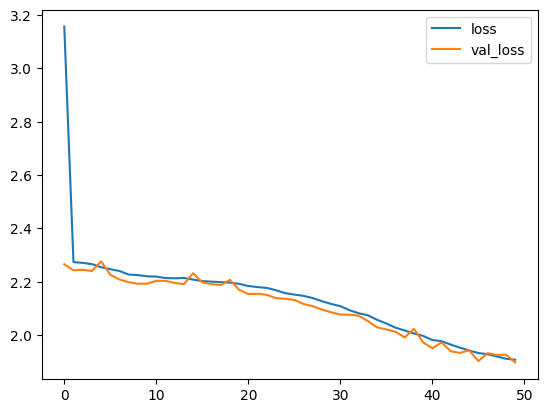

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

ipl = pd.read_csv('ipl_data.csv')
ipl.head()

df = ipl.drop(['date','runs','wickets','overs','runs_last_5','wickets_last_5','mid','striker','non-striker'],axis=1)
X=df.drop(['total'],axis=1)
y=df['total']


from sklearn.preprocessing import LabelEncoder
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue']= venue_encoder.fit_transform(X['venue'])
X['bat_team']=batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team']=bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman']=striker_encoder.fit_transform(X['batsman'])
X['bowler']=bowler_encoder.fit_transform(X['bowler'])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([keras.layers.Input(shape=(X_train_scaled.shape[1],)),
                          keras.layers.Dense(512,activation='relu'),
                          keras.layers.Dense(216,activation='relu'),
                          keras.layers.Dense(1,activation='linear')])
huber_loss = tf.keras.losses.Huber(delta=0.1)
model.compile(optimizer='adam',loss=huber_loss)

model.fit(X_train_scaled,y_train,epochs=50,batch_size=64,validation_data=(X_test_scaled,y_test))

model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

predictions = model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

import ipywidgets as widgets
from IPython.display import display , clear_output
import warnings
warnings.filterwarnings("ignore")

venue =widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue')
batting_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(),description='Select Batting Team')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),description='Select Bowling Team')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(),description='Select Striker')
bowler =widgets.Dropdown(options=df['bowler'].unique().tolist(),description='Select Bowler')

predict_button =widgets.Button(description='Predict')

def predict_score(b):
  with output:
    clear_output()

    decoded_venue =venue_encoder.transform([venue.value])
    decoded_batting_team =batting_team_encoder.transform([batting_team.value])
    decoded_bowling_team =bowling_team_encoder.transform([bowling_team.value])
    decoded_striker =striker_encoder.transform([striker.value])
    decoded_bowler = striker_encoder.transform([bowler.value])

    input=np.array([decoded_venue,decoded_batting_team,decoded_bowling_team,decoded_striker,decoded_bowler])
    input=input.reshape(1,5)
    input=scaler.transform(input)
    predicted_score =model.predict(input)
    predicted_score =int(predicted_score[0,0])
    print(predicted_score)


predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


